# Predicting Airbnb Listing Prices
            San Francisco, CA
### What can you expect to pay for a night in San Francisco?

Inside Airbnb is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world. When traveling, I almost always prefer to rent a home or apartment through Airbnb as opposed to booking a hotel. From experience (and some common knowledge) I assumed that location and accomodation size would be the most significant factors in price when booking a rental. Being from the San Francisco Bay Area, I was curious about the rentals in one of the most expensive cities in the world. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Loading and Exploring the Data Set

In [7]:
raw_df = pd.read_csv('sf_airbnb.csv', encoding="iso-8859-1")

In [8]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [9]:
raw_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,2.020000e+13,10/14/2019,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,7/31/2008,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,...,10/14/2019,217,52,7/23/2009,9/21/2019,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,2.020000e+13,10/14/2019,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI donât allow chec...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",Airbnb has no default house rules that hosts c...,NaN,NaN,https://a0.muscache.com/im/pictures/b6e97d2a-1...,NaN,4921,https://www.airbnb.com/users/show/4921,Kevin,12/8/2008,"San Francisco, California, United States",I am a retired software developer now raising ...,...,10/14/2019,160,36,7/16/2009,9/30/2019,94.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-0000346,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
2,5858,https://www.airbnb.com/rooms/5858,2.020000e+13,10/14/2019,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,3/2/2009,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,...,10/14/2019,111,0,5/3/2009,8/6/2017,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,NaN,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.87
3,7918,https://www.airbnb.com/rooms/7918,2.020000e+13,10/14/2019,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",Wi-Fi signal in common areas. Large eat in k...,N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of s

In [10]:
raw_df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.111000e+03,8.111000e+03,0.0,0.0,0.0,8.111000e+03,0.0,8103.000000,8103.000000,0.0,8111.000000,8111.000000,8111.000000,8099.000000,8107.000000,8102.000000,124.000000,8111.000000,8.111000e+03,8.111000e+03,8.111000e+03,8.111000e+03,8.111000e+03,8.111000e+03,8.111000e+03,8.111000e+03,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000,6460.000000,6457.000000,6457.000000,6456.000000,6458.000000,6456.000000,6456.000000,8111.000000,8111.000000,8111.000000,8111.000000,6506.000000
mean,2.024561e+07,2.020000e+13,NaN,NaN,NaN,6.159690e+07,NaN,90.421079,90.421079,NaN,37.766054,-122.430107,3.160769,1.395975,1.345874,1.744754,1046.177419,1.718407,1.234526e+04,1.284597e+04,1.234509e+04,1.235125e+04,2.775902e+05,2.775928e+05,1.235001e+04,2.775923e+05,9.255825,22.885341,39.619529,159.278881,45.203181,13.712736,95.421517,9.752207,9.603686,9.847584,9.817745,9.682776,9.375155,22.329799,18.201085,2.910985,0.496979,1.873298
std,1.228565e+07,0.000000e+00,NaN,NaN,NaN,8.017417e+07,NaN,324.526784,324.526784,NaN,0.022937,0.026967,1.896988,0.923213,0.925298,1.158799,827.297727,1.334492,1.110357e+06,1.110352e+06,1.110357e+06,1.110357e+06,2.387044e+07,2.387044e+07,1.110357e+06,2.387044e+07,10.586687,21.459500,32.125850,134.093744,78.437987,22.523539,7.571031,0.732872,0.839768,0.593539,0.659274,0.715906,0.879174,54.369225,53.333669,6.807334,2.669129,2.096730
min,9.580000e+02,2.020000e+13,NaN,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,37.704630,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,8.905668e+06,2.020000e+13,NaN,NaN,NaN,4.386571e+06,NaN,1.000000,1.000000,NaN,37.751450,-122.442830,2.000000,1.000000,1.000000,1.000000,500.000000,1.000000,2.000000e+00,2.900000e+01,2.000000e+00,2.000000e+00,2.900000e+01,2.900000e+01,2.000000e+00,2.900000e+01,0.000000,0.000000,6.000000,28.000000,1.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.300000
50%,2.161057e+07,2.020000e+13,NaN,NaN,NaN,2.178983e+07,NaN,2.000000,2.000000,NaN,37.769150,-122.424650,2.000000,1.000000,1.000000,1.000000,851.000000,1.000000,4.000000e+00,1.800000e+02,4.000000e+00,5.000000e+00,1.800000e+02,1.800000e+02,4.000000e+00,1.800000e+02,5.000000,19.000000,38.000000,133.000000,10.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.010000
75%,3.120025e+07,2.020000e+13,NaN,NaN,NaN,1.000763e+08,NaN,12.000000,12.000000,NaN,37.785670,-122.410615,4.000000,1.500000,2.000000,2.000000,1492.500000,2.000000,3.000000e+01,1.125000e+03,3.000000e+01,3.000000e+01,1.125000e+03,1.125000e+03,3.000000e+01,1.125000e+03,17.000000,42.000000,69.500000,300.000000,54.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.000000,0.000000,2.840000
max,3.935418e+07,2.020000e+1

# Data Cleaning

After examining the head of the dataframe and the descriptive statistics for each column, I did an initial elimination of variables for various reasons.

Id and url columns or columns with no values

In [11]:
raw_df.drop(['id','scrape_id','host_id','thumbnail_url', 'medium_url', 'xl_picture_url', 'listing_url', 
             'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'picture_url', 'host_url',
             'neighbourhood_group_cleansed','license'], axis=1, inplace=True)

Columns that are location specific. All listings are in San Francisco and I used the column, cleansed neighborhood, to identify the specific location.

In [12]:
raw_df.drop(['street', 'neighbourhood','city', 'state', 'zipcode', 'market', 'smart_location', 'country_code',
            'latitude', 'longitude','country'], axis=1, inplace=True)

Time sensitive columns

In [13]:
raw_df.drop(['last_scraped','calendar_updated', 'calendar_last_scraped','availability_30', 'availability_60', 
             'availability_90','availability_365', 'number_of_reviews_ltm', 'has_availability'], axis=1, inplace=True)

Text based columns

In [14]:
raw_df.drop(['name', 'summary', 'space', 'description', 'experiences_offered','neighborhood_overview', 
             'notes', 'transit', 'access', 'interaction', 'house_rules','host_name', 
             'host_since', 'host_location', 'host_about', 
             'host_neighbourhood', 'host_verifications','first_review', 'last_review', 
             'jurisdiction_names'], axis=1, inplace=True)

Other redundant or insignificant columns

In [15]:
raw_df.drop(['host_total_listings_count','square_feet','minimum_minimum_nights', 'maximum_minimum_nights', 
             'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
             'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value', 
             'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
             'calculated_host_listings_count_private_rooms', 
             'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

Next, I addressed any missing values. I calculated the percent of null values and organized in descending order. 

In [16]:
(raw_df.isnull().sum()*100/raw_df.isnull().count()).sort_values(ascending=False)

monthly_price                       87.128591
weekly_price                        86.820367
security_deposit                    20.860560
review_scores_rating                20.355073
reviews_per_month                   19.787942
host_response_rate                  11.428924
host_response_time                  11.428924
cleaning_fee                        11.391937
bathrooms                            0.147947
beds                                 0.110960
host_is_superhost                    0.098631
host_listings_count                  0.098631
host_has_profile_pic                 0.098631
host_identity_verified               0.098631
bedrooms                             0.049316
require_guest_profile_picture        0.000000
neighbourhood_cleansed               0.000000
is_location_exact                    0.000000
property_type                        0.000000
room_type                            0.000000
accommodates                         0.000000
requires_license                  

Since monthly price and weekly price are missing greater than 80% of values, I dropped both of them. 

In [17]:
raw_df.drop(['monthly_price', 'weekly_price'], axis=1, inplace=True)

Next, I took a closer look at the columns I planned to keep. A few columns need formatting and cleaning up. 

In [18]:
raw_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,within a day,100%,t,1.0,t,t,Western Addition,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,217,97.0,t,f,f,moderate,f,f,1.74
1,within an hour,100%,t,2.0,t,t,Inner Sunset,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",$99.00,$0.00,$10.00,2,$20.00,1,5,160,94.0,t,f,f,strict_14_with_grace_period,f,f,1.28
2,within a day,80%,f,2.0,t,t,Bernal Heights,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",$235.00,NaN,$100.00,2,$0.00,30,60,111,98.0,t,f,f,strict_14_with_grace_period,f,f,0.87
3,within an hour,86%,t,10.0,t,t,Haight Ashbury,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,32,60,18,86.0,t,f,f,strict_14_with_grace_period,f,f,0.15
4,within an hour,86%,t,10.0,t,t,Haight Ashbury,t,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,$200.00,$50.00,1,$12.00,32,90,8,93.0,t,f,f,strict_14_with_grace_period,f,f,0.13


In [19]:
money_columns =['price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in money_columns:
    raw_df[col] = pd.to_numeric(raw_df[col].str.strip('$'), errors='coerce')

In [20]:
raw_df.replace({'f': 0, 't': 1}, inplace=True)

In [21]:
raw_df['host_response_rate'] = pd.to_numeric(raw_df['host_response_rate'].str.strip('%'), errors='coerce')

In [22]:
raw_df['security_deposit'].fillna(0, inplace=True)
raw_df['cleaning_fee'].fillna(0, inplace=True)
raw_df['host_is_superhost'].fillna(0, inplace=True)
raw_df['host_has_profile_pic'].fillna(0, inplace=True)
raw_df['host_identity_verified'].fillna(0, inplace=True)

Amenities is a complicated variable. It is a list of the amenities that are included for each rental. While some amenities are more significant than others, I decided to turn the column into the length of the amenities.

In [23]:
raw_df['amenities'] = raw_df.amenities.str.split(',')
raw_df['amenities_number'] = raw_df['amenities'].str.len()
raw_df.drop(['amenities'], axis=1, inplace=True)

In [24]:
raw_df.dtypes

host_response_time                   object
host_response_rate                  float64
host_is_superhost                   float64
host_listings_count                 float64
host_has_profile_pic                float64
host_identity_verified              float64
neighbourhood_cleansed               object
is_location_exact                     int64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
price                               float64
security_deposit                    float64
cleaning_fee                        float64
guests_included                       int64
extra_people                        float64
minimum_nights                        int64
maximum_nights                        int64
number_of_reviews               

## Categorical Data

To better understand the remaining variables, I split them into two types: Categorical and Continuous

In [25]:
non_numeric_columns = raw_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'], dtype='object')
The number of non-numerical columns is 6


In [ ]:
plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(4,3,index+1)
    plt.bar(raw_df.groupby(column)["price"].mean().index, raw_df.groupby(column)["price"].mean(),
           color=("grey","green"))
    plt.title("Average price wrt. {}".format(column))
    plt.ylabel("Average price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

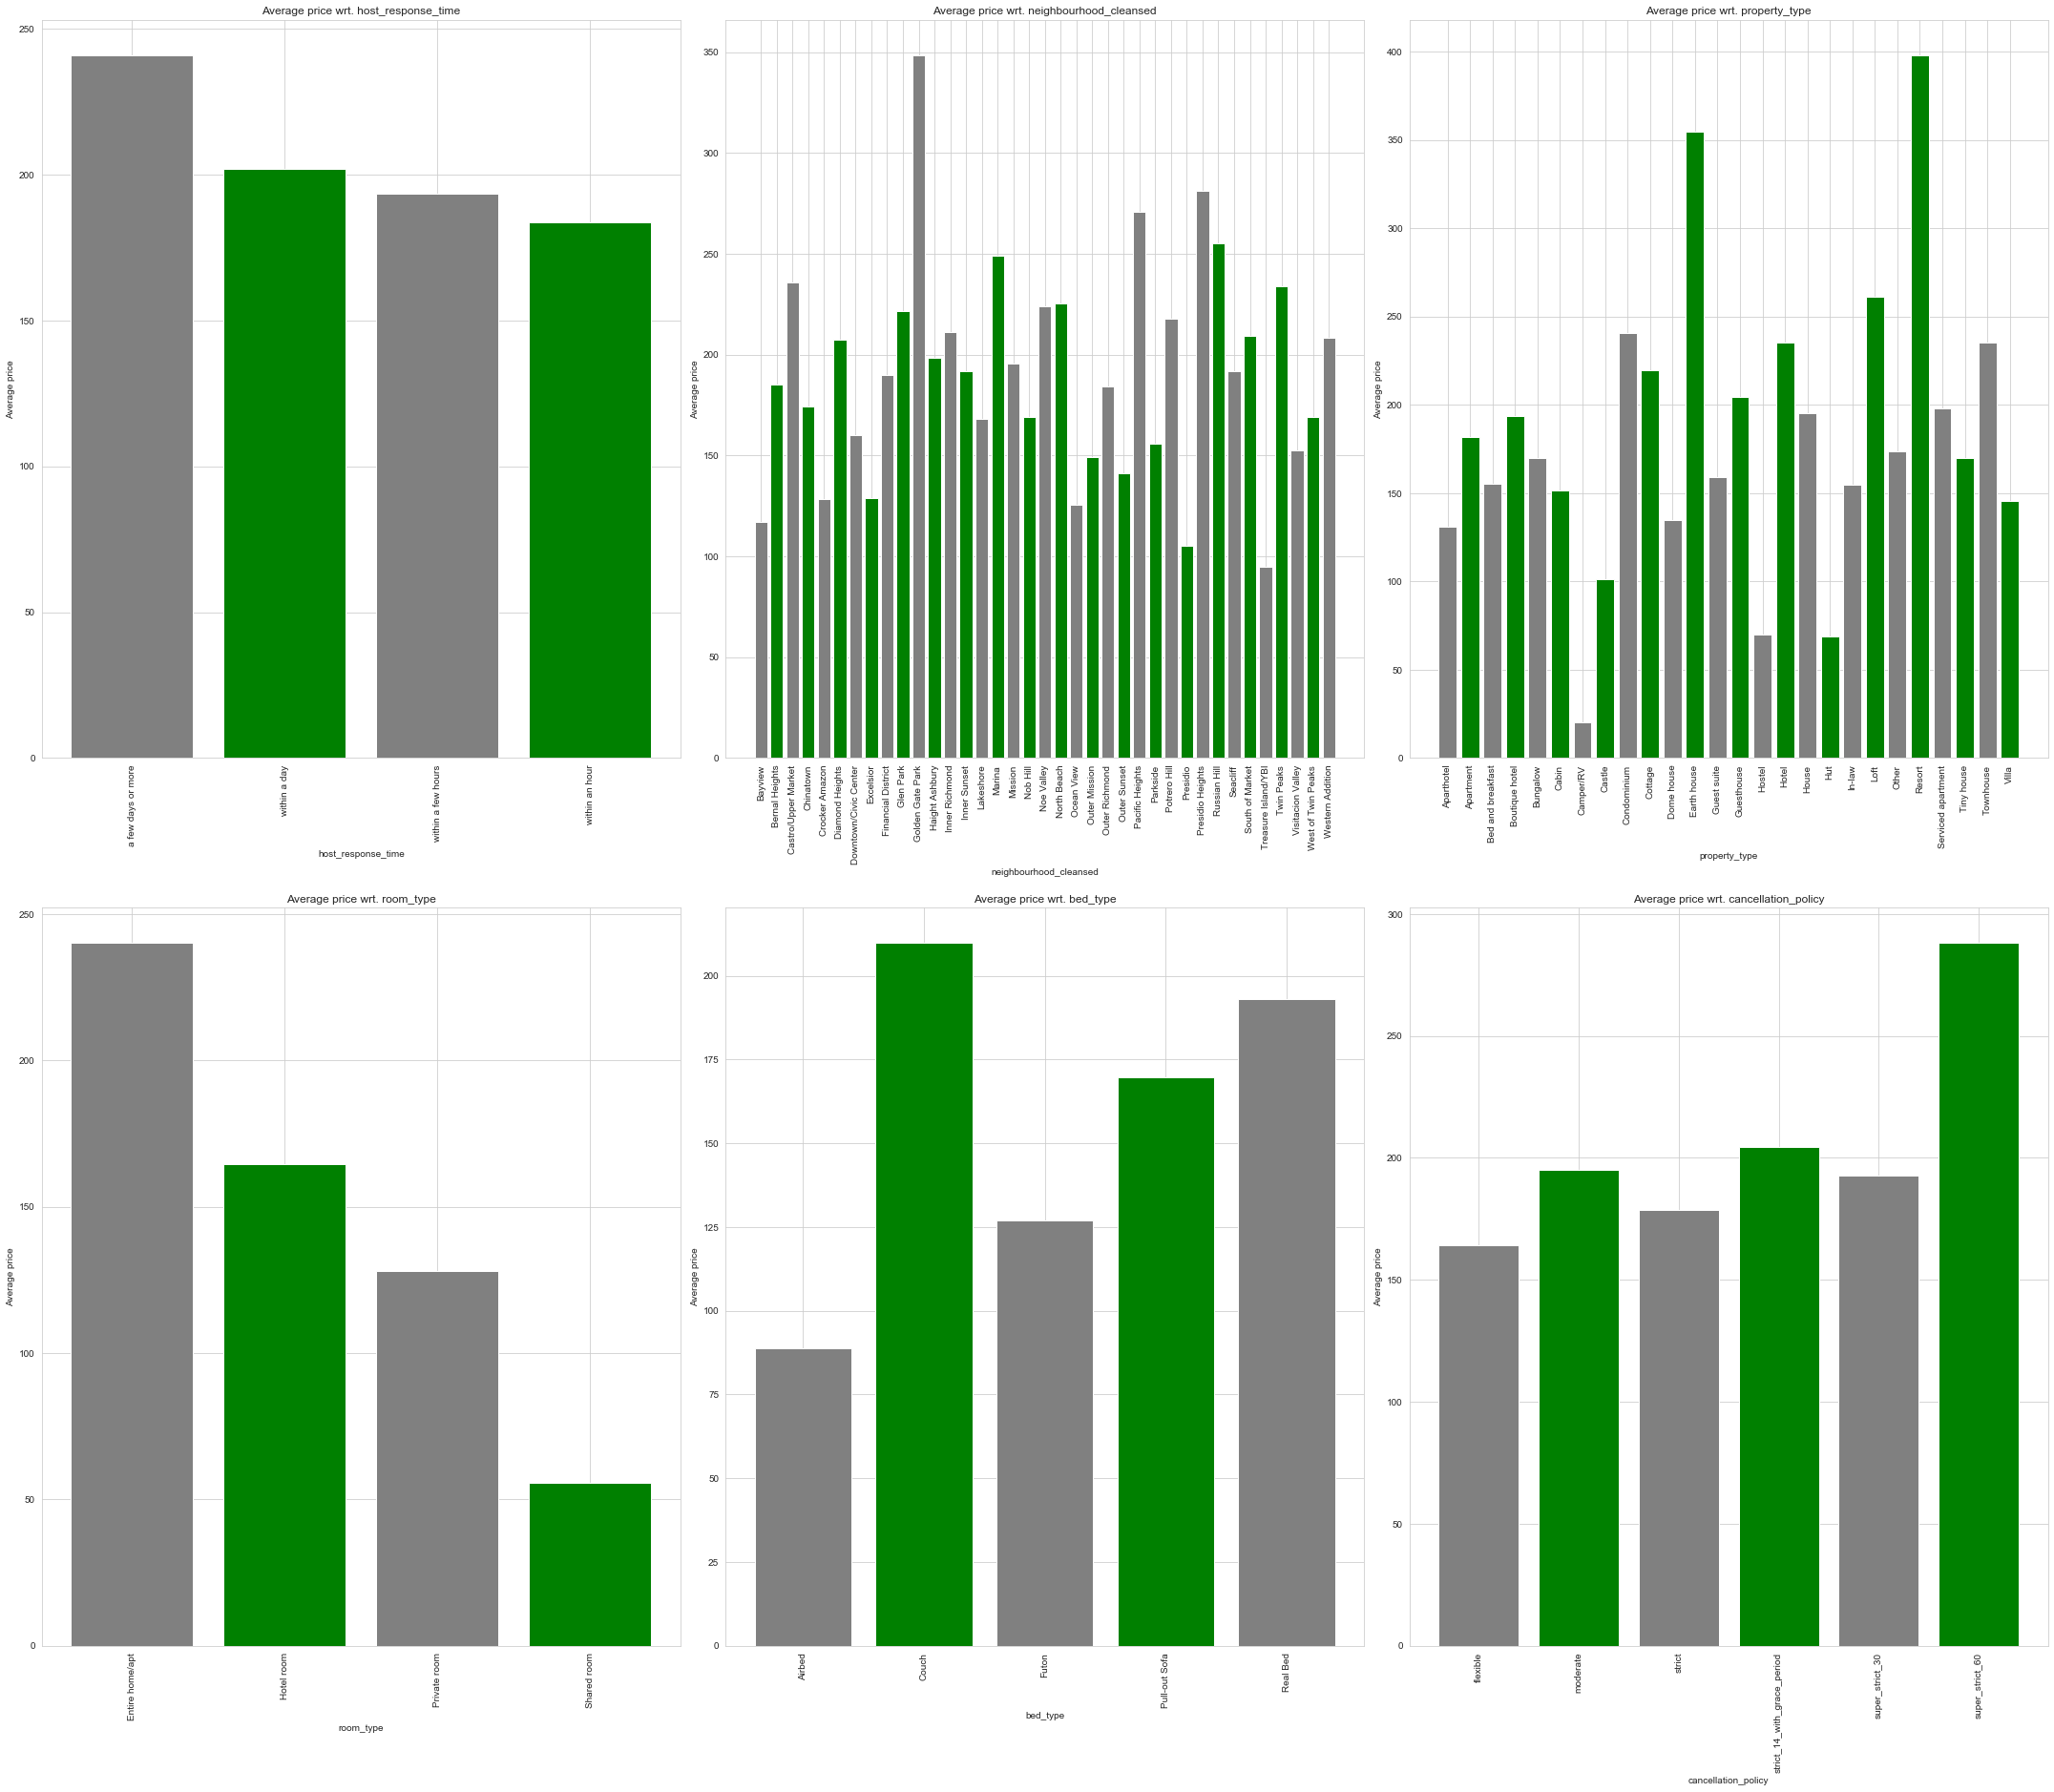

In [26]:
plt.tight_layout()
plt.show()

After investigating "bed type", it looks like those that say other than bed also have an actual bed in addition to a couch, futon, etc. I dropped the column bed type. 

In [27]:
raw_df.drop(['bed_type'], axis=1, inplace=True)

In [28]:
raw_df.property_type.replace({
    'Townhouse': 'House',
    'Condominium' : 'Apartment',
    'Serviced apartment': 'Apartment',
    'Hostel': 'Apartment',
    'Loft': 'Apartment',
    'Aparthotel': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Guesthouse': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
raw_df.loc[~raw_df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [29]:
raw_df['host_response_time'].fillna("unknown", inplace=True)

With the remaining categorical variables, I converted them into dummies and added the columns to the dataframe. 

In [30]:
dummy_list = ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type','cancellation_policy']
for col in dummy_list:
    raw_df = pd.concat([raw_df,pd.get_dummies(raw_df[col], prefix=col, drop_first=True)], axis=1)
    dummy_column_names = list(pd.get_dummies(raw_df[col], prefix=col, drop_first=True).columns)

In [31]:
raw_df.drop(['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type','cancellation_policy'], axis=1, inplace=True)

## Continuous Data

In [32]:
numeric_columns = raw_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'amenities_number'],
      dtype='object')
The number of numerical columns is 26


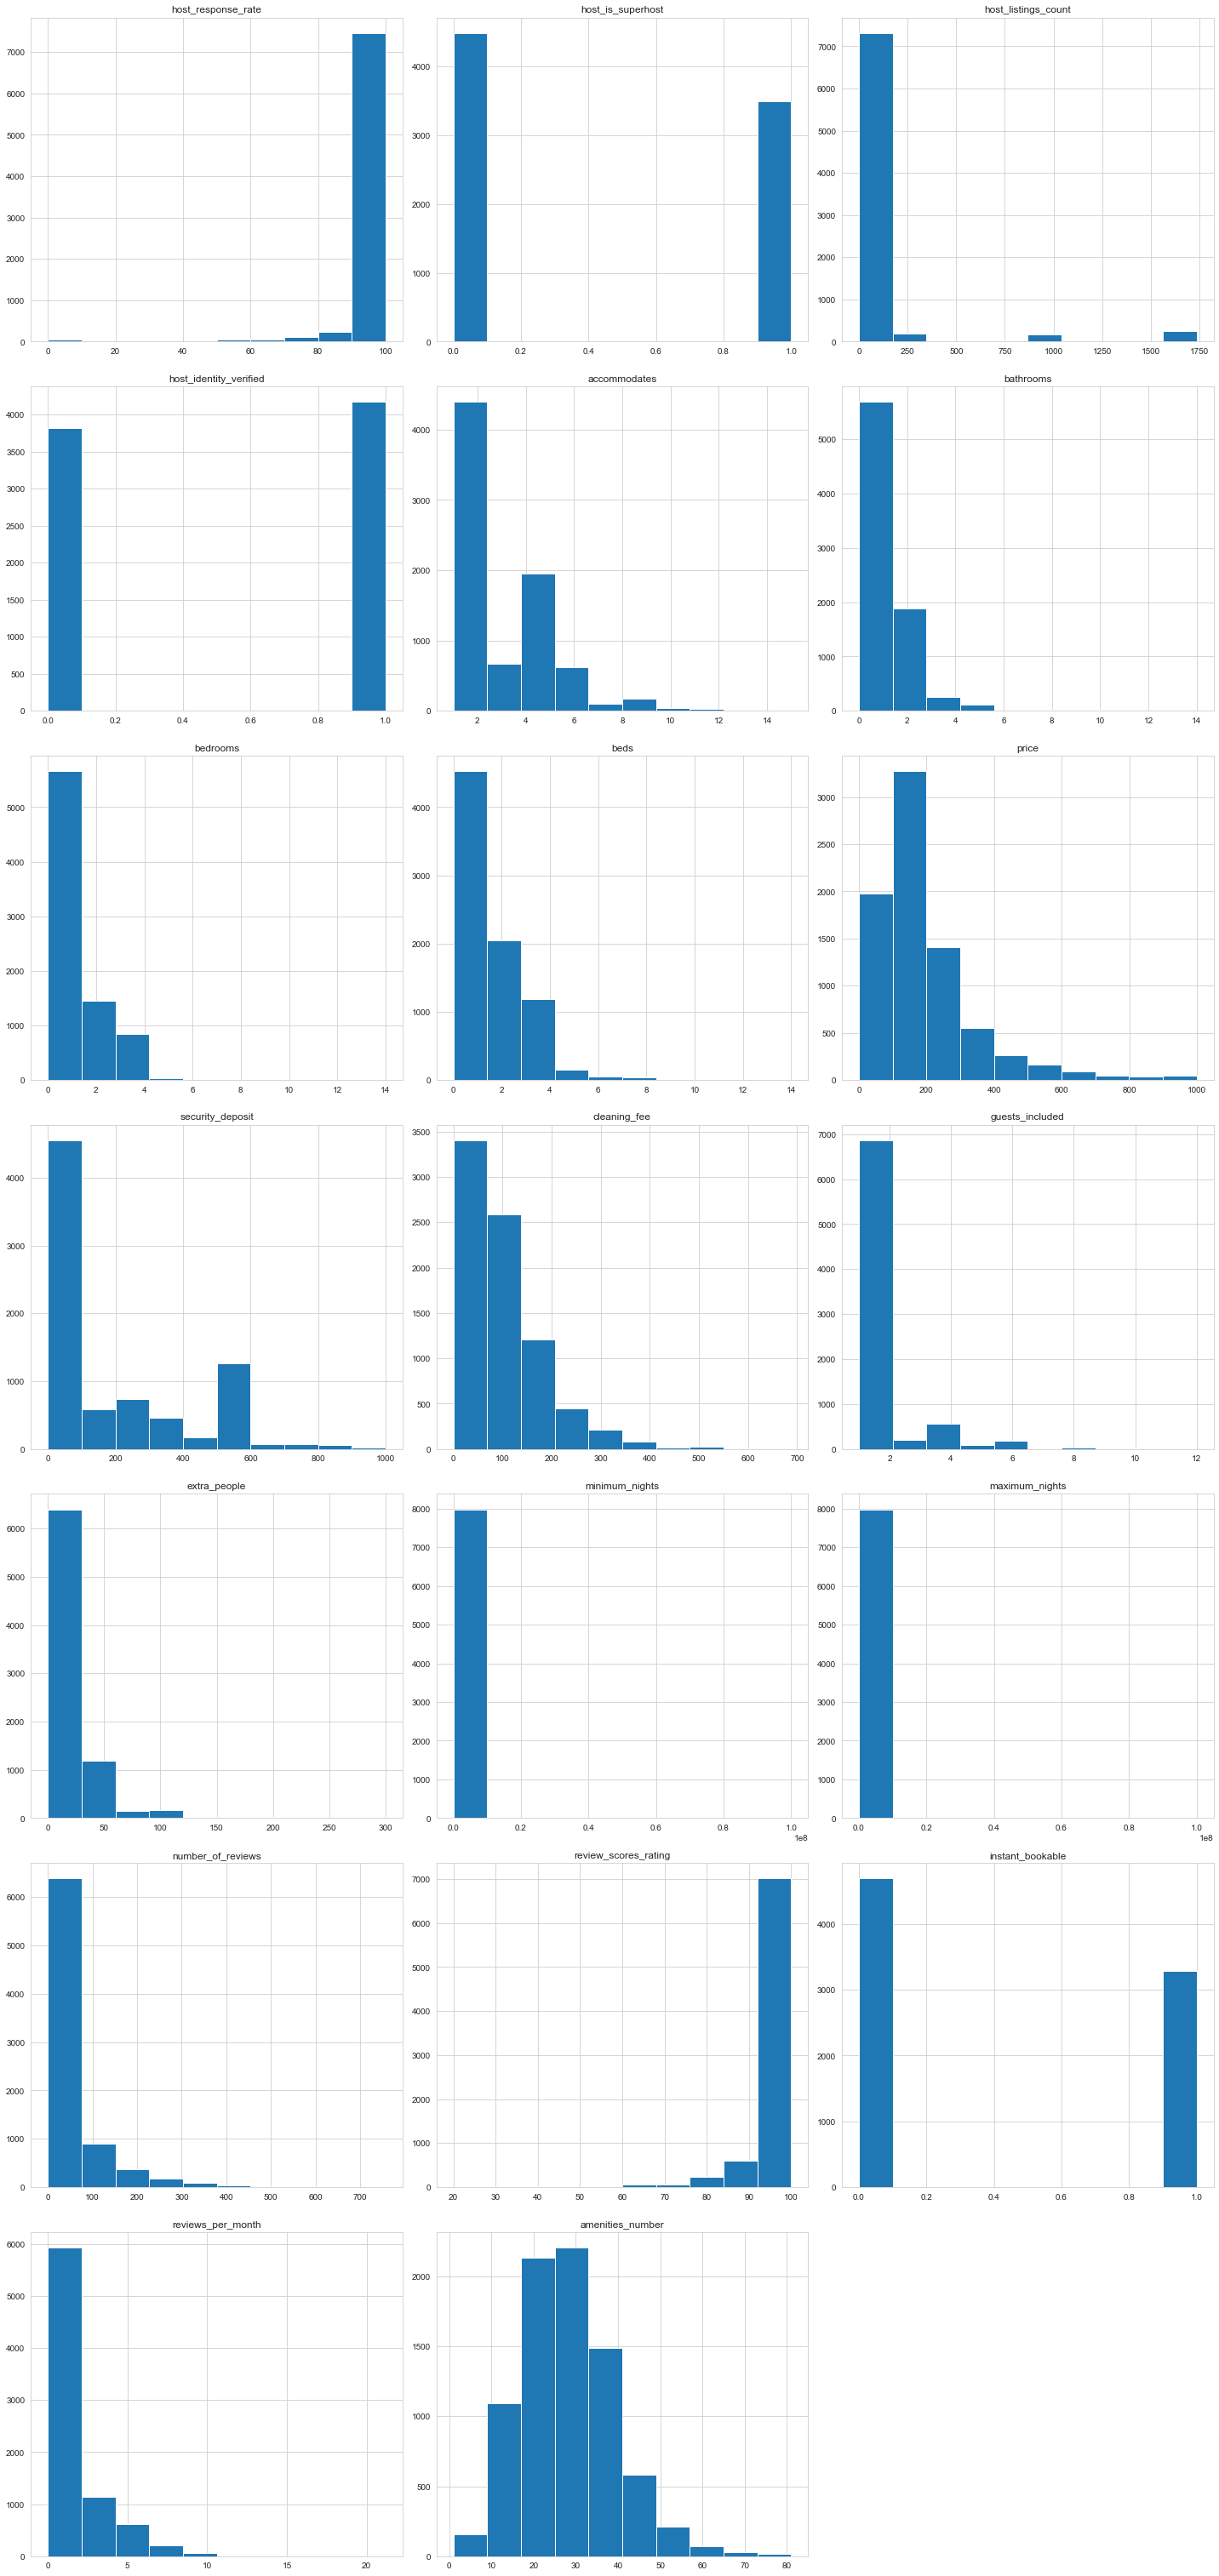

In [67]:
variables_to_plot = list(raw_df[numeric_columns])
fig = plt.figure(figsize=(20,60))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(10,3,i+1)
    raw_df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()

Some variables were overwhelmingly either 0 or 1. I decided to drop those columns since they likely won't have much impact.

In [34]:
raw_df.drop(['host_has_profile_pic', 'is_location_exact', 'requires_license',
                    'is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification'],
                  axis=1, inplace=True)

Next, I filled in missing values using either the median or mean. 

In [35]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    raw_df[col].fillna(raw_df[col].median(), inplace=True)

In [36]:
raw_df['host_response_rate'].fillna(raw_df['host_response_rate'].mean(), inplace=True)
raw_df['review_scores_rating'].fillna(raw_df['review_scores_rating'].mean(), inplace=True)
raw_df['reviews_per_month'].fillna(raw_df['reviews_per_month'].mean(), inplace=True)
raw_df['host_listings_count'].fillna(raw_df['host_listings_count'].mean(), inplace=True)

In [37]:
numeric_columns = raw_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'reviews_per_month', 'amenities_number'], dtype='object')
The number of numerical columns is 20


In [38]:
(raw_df[numeric_columns].isnull().sum()*100/raw_df[numeric_columns].isnull().count()).sort_values(ascending=False)

price                     1.590433
amenities_number          0.000000
reviews_per_month         0.000000
host_is_superhost         0.000000
host_listings_count       0.000000
host_identity_verified    0.000000
accommodates              0.000000
bathrooms                 0.000000
bedrooms                  0.000000
beds                      0.000000
security_deposit          0.000000
cleaning_fee              0.000000
guests_included           0.000000
extra_people              0.000000
minimum_nights            0.000000
maximum_nights            0.000000
number_of_reviews         0.000000
review_scores_rating      0.000000
instant_bookable          0.000000
host_response_rate        0.000000
dtype: float64

There are a small number of rows that do not have a value for price. I decided to drop just those rows since price is the target variable. 

In [39]:
raw_df.dropna(subset=['price'], inplace=True)

## Defining Variables for Model Selection

In [40]:
new_df = raw_df.drop(['price'], axis=1)

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize, scale

cols = new_df.columns


min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(new_df)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized

,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,amenities_number,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,...,neighbourhood_cleansed_Outer Richmond,neighbourhood_cleansed_Outer Sunset,neighbourhood_cleansed_Pacific Heights,neighbourhood_cleansed_Parkside,neighbourhood_cleansed_Potrero Hill,neighbourhood_cleansed_Presidio,neighbourhood_cleansed_Presidio Heights,neighbourhood_cleansed_Russian Hill,neighbourhood_cleansed_Seacliff,neighbourhood_cleansed_South of Market,neighbourhood_cleansed_Treasure Island/YBI,neighbourhood_cleansed_Twin Peaks,neighbourhood_cleansed_Visitacion Valley,neighbourhood_cleansed_West of Twin Peaks,neighbourhood_cleansed_Western Addition,property_type_House,property_type_Other,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1.000000,1.0,0.000576,1.0,0.142857,0.071429,0.071429,0.142857,0.1001,0.145349,0.090909,0.083333,0.000000e+00,2.900000e-07,0.286658,0.962500,0.0,0.081681,0.3875,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.000000,1.0,0.001153,1.0,0.071429,0.071429,0.071429,0.071429,0.0000,0.014535,0.090909,0.066667,0.000000e+00,4.000000e-08,0.211361,0.925000,0.0,0.059962,0.3625,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.800000,0.0,0.001153,1.0,0.285714,0.071429,0.142857,0.214286,0.0000,0.145349,0.090909,0.000000,2.900000e-07,5.900000e-07,0.146631,0.975000,0.0,0.040604,0.2000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.860000,1.0,0.005764,1.0,0.071429,0.285714,0.071429,0.071429,0.2002,0.072674,0.000000,0.040000,3.100000e-07,5.900000e-07,0.023778,0.825000,0.0,0.006610,0.2125,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.860000,1.0,0.005764,1.0,0.071429,0.285714,0.071429,0.071429,0.2002,0.072674,0.000000,0.040000,3.100000e-07,8.900000e-07,0.010568,0.912500,0.0,0.005666,0.1875,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,0.965181,0.0,0.000000,0.0,0.285714,0.142857,0.214286,0.285714,0.0000,0.218023,0.000000,0.166667,2.900000e-07,1.124000e-05,0.000000,0.942769,1.0,0.087974,0.3750,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7978,1.000000,0.0,0.005187,0.0,0.214286,0.071429,0.071429,0.142857,0.0000,0.000000,0.000000,0.000000,0.000000e+00,6.000000e-08,0.000000,0.942769,1.0,0.087974,0.1875,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7979,0.780000,0.0,0.003458,1.0,0.000000,0.142857,0.071429,0.000000,0.0000,0.000000,0.000000,0.000000,2.900000e-07,9.200000e-07,0.000000,0.942769,1.0,0.087974,0.1750,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7980,0.980000,0.0,0.518732,0.0,0.071429,0.071429,0.071429,0.071429,0.0000,0.218023,0.000000,0.000000,2.9000

Here, I separated the target variable, price, and reset the index.

In [42]:
price_df = pd.DataFrame(raw_df.price)

price_df = price_df.reset_index(drop=True)

raw_df['price'] = raw_df['price'].reset_index(drop=True)

df_normalized = df_normalized.reset_index(drop=True)

# Model Selection Phase

In [43]:
import statsmodels.api as sm
X = df_normalized
y = price_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     87.69
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:01:20   Log-Likelihood:                -38763.
No. Observations:                6385   AIC:                         7.767e+04
Df Residuals:                    6315   BIC:                         7.814e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             -92.8589     22.969     -4.043      0.000    -137.885     -47.833
host_response_rate                                -24.0035     22.158     -1.083      0.279     -67.441      19.434
host_is_superhost                                  -3.4692      3.223     -1.076      0.282      -9.788       2.850
host_listings_count                               -42.9992     10.348     -4.155      0.000     -63.284     -22.714
host_identity_verified                             12.2792      2.962      4.145      0.000       6.472      18.087
accommodates                                      336.1900     21.490     15.644      0.000     294.061     378.319
bathrooms                                          40.4083     24.282      1.664      0.096      -7.193      88.010
bedrooms                                          640.3416     37.133     17.245      0.000     567.548     713.135
beds                                              -94.9398     32.091     -2.958      0.003    -157.850     -32.030
security_deposit                                  -24.8637      6.935     -3.585      0.000     -38.459     -11.269
cleaning_fee                                       10.7892     15.218      0.709      0.478     -19.043      40.622
guests_included                                    69.1453     15.412      4.486      0.000      38.932      99.358
extra_people                                       51.9389     14.739      3.524      0.000      23.045      80.833
minimum_nights                                   1.999e+05   9.77e+04      2.046      0.041    8339.737    3.91e+05
maximum_nights                                      -2e+05   9.77e+04     -2.047      0.041   -3.92e+05   -8422.487
number_of_reviews                                -136.7009     17.385     -7.863      0.000    -170.781    -102.621
review_scores_rating                              107.8232     16.592      6.499      0.000      75.297     140.349
instant_bookable                                   -7.7043      3.002     -2.566      0.010     -13.590      -1.819
reviews_per_month                                  14.4987     20.798      0.697      0.486     -26.273      55.270
amenities_number                                   92.4700     11.047      8.371      0.000      70.814     114.126
host_response_time_unknown                         18.2941     23.481      0.779      0.436     -27.737      64.325
host_response_time_within a day                     0.8322     21.947      0.038      0.970     -42.191      43.856
host_response_time_within a few hours               3.1075     23.384      0.133      0.894     -42.733      48.948
host_response_time_within an hour                   7.9474     23.6

## Regularization Models

In [44]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [45]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train_lrm = lrm.predict(X_train)
y_preds_test_lrm = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_lrm)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_lrm)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lrm)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lrm) / y_test)) * 100))

R-squared of the model in training set is: 0.4893088561878854
-----Test set statistics-----
R-squared of the model in test set is: 0.5405596331520719
Mean absolute error of the prediction is: 62.59653182739453
Mean squared error of the prediction is: 9453.11941617606
Root mean squared error of the prediction is: 97.22715369780224
Mean absolute percentage error of the prediction is: 40.87547769118613


In [46]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train_lasso = lasso_cv.predict(X_train)
y_preds_test_lasso = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_lasso)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_lasso)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Best alpha value is: 0.01
R-squared of the model in training set is: 0.48869521813848416
-----Test set statistics-----
R-squared of the model in test set is: 0.5398450083058909
Mean absolute error of the prediction is: 62.56711749595005
Mean squared error of the prediction is: 9467.82303060825
Root mean squared error of the prediction is: 97.30273907043033
Mean absolute percentage error of the prediction is: 40.78417332209372


In [47]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train_ridge = ridge_cv.predict(X_train)
y_preds_test_ridge = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_ridge)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_ridge)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.4884561300146075
-----Test set statistics-----
R-squared of the model in test set is: 0.5400219587723946
Mean absolute error of the prediction is: 62.671538332576645
Mean squared error of the prediction is: 9464.18222320144
Root mean squared error of the prediction is: 97.28402861313587
Mean absolute percentage error of the prediction is: 40.96918774354762


In [48]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train_elastic = elasticnet_cv.predict(X_train)
y_preds_test_elastic = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_elastic)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_elastic)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_elastic)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_elastic) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.4888980231904689
-----Test set statistics-----
R-squared of the model in test set is: 0.5401711386268704
Mean absolute error of the prediction is: 62.633395242772195
Mean squared error of the prediction is: 9461.112804228695
Root mean squared error of the prediction is: 97.26825177944083
Mean absolute percentage error of the prediction is: 40.906799439409106


After comparing the three linear models, I could see there was not much variation in the results. With elasticnet having the largest R-squared value at 0.54, I decided to try another regression method.

In [49]:
from sklearn import ensemble

## Random Forest 

In [58]:
rfr = ensemble.RandomForestRegressor(n_estimators=1000)
rgr_1 = rfr.fit(X_train, y_train)
X = df_normalized
y = price_df['price']

In [59]:
cross_val_score(rfr_1, X, y, cv=5)

array([0.64955305, 0.64688758, 0.62645154, 0.51028733, 0.45089497])

In [60]:
y_preds_test_1 = rgr_1.predict(X_test)
print("R-squared of the model in test set is: {}".format(rgr_1.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_1)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_1)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_1)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_1) / y_test)) * 100))

R-squared of the model in test set is: 0.663402109320752
Mean absolute error of the prediction is: 48.24194893894676
Mean squared error of the prediction is: 6925.599676088312
Root mean squared error of the prediction is: 83.22018791187816
Mean absolute percentage error of the prediction is: 28.300303475071697


The results from the cross validation scores had some significant variation with one of the values as low as 0.45. I decided to tune the model and fit it with a bagging regressor. 

In [61]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

rfr_2 = ensemble.RandomForestRegressor()
rgr_2 = BaggingRegressor(base_estimator=rfr_2,
                        n_estimators=500, random_state=0).fit(X_train, y_train)

In [62]:
y_preds_test_2 = rgr_2.predict(X_test)
print("R-squared of the model in test set is: {}".format(rgr_2.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_2) / y_test)) * 100))

R-squared of the model in test set is: 0.6644977471385252
Mean absolute error of the prediction is: 48.84037743293595
Mean squared error of the prediction is: 6903.056608748918
Root mean squared error of the prediction is: 83.0846352146347
Mean absolute percentage error of the prediction is: 29.689431955556678


In [63]:
rfr_3= ensemble.RandomForestRegressor()
rgr_3 = BaggingRegressor(base_estimator=rfr_3,
                        n_estimators=1000, random_state=0).fit(X_train, y_train)

In [64]:
y_preds_test_3 = regr_3.predict(X_test)
print("R-squared of the model in test set is: {}".format(rgr_3.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_3)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_3)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_3)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_3) / y_test)) * 100))

R-squared of the model in test set is: 0.6649466995579367
Mean absolute error of the prediction is: 48.79354716056906
Mean squared error of the prediction is: 6893.819281907146
Root mean squared error of the prediction is: 83.02902674310441
Mean absolute percentage error of the prediction is: 29.61504362830512


With and R-squared value of 0.6649, the final random forest regressor is the best model. However, I would like to see better results.  In order to feel confident in my price estimations, I would hope to see an R-squared value closer to 0.8. My next concern would be the mean absolute error. With a value of 48.79, I would expect my predictions to be off by about $49. That is not an insignificant amount of money if it were to be added on to your bill each night. This model could be useful for individuals looking to rent their property. To be competitive they should know the listing prices for similar properties.